# Instalando as bibliotecas necessarias


In [5]:
import requests as rq
import pathlib as path
import pandas as pd
import json
import shutil
import urllib.request
import os
import zipfile
import time
from IPython.display import Image
#from PIL import Image
import io

url_api = "https://localhost:44346/v1/Demo/"

# DOWNLOAD DAS PARTIDAS

Será feito o download de mais de 450 demos e armazenadas em um json para maior facilidade de manuseio

In [4]:
ligas = pd.read_csv("ligas_gc_2021.csv", sep=',')
index = 1;
start = time.time()

print("Baixando todas partidas demo...")

for link in ligas['demo']:
    filedata = urllib.request.urlopen(link)
    data = filedata.read()
    mypath = "partidas"
    
    if not os.path.exists(mypath):
        os.makedirs(mypath, 0o0755)
        print("Pasta criada.")
    
    fileName = mypath + "/" + "partida" + str(index) + ".rar"
    
    with open(fileName, 'wb') as f:
        f.write(data)
        
    with zipfile.ZipFile(fileName) as zip_ref:
        zip_ref.extractall('partidas')
        
    os.remove(fileName)
    
    index+=1;

end = time.time()
tem
print("Todas as partidas baixadas em: ")

Baixando todas partidas demo...
Path created


KeyboardInterrupt: 

# Agora vamos consumir a API e seus metodos 

Primeiro metodo a ser executado retorna as informações sobre todas as armas que fizeram pelo menos 1 morte no jogo                                                                                                                                     
Atributos:                                                                                                                 
    Nome da arma                                                                                                           
    Quantidade de mortes                                                                                                   
    Tipo da arma                                                                                                            

In [2]:
content = rq.get(url_api + "GetWeapons", verify=False).content
pd.read_json(content)

C:\Users\vitor\anaconda3\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


,NameWeapon,DeathQuantity,WeaponType
0,Knife,8,Equipment
1,USP,11,Pistol
2,Glock,7,Pistol
3,UMP,7,SMG
4,AK47,55,Rifle
5,AWP,31,Rifle
6,Famas,6,Rifle
7,Incendiary,3,Grenade
8,M4A4,20,Rifle
9,AUG,33,Rifle


### Metodo GetPlayers, retorna o nome do jogador o numero de abates e mortes

In [4]:
content = rq.get(url_api + "GetPlayers", verify=False).content
pd.read_json(content)

C:\Users\vitor\anaconda3\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


,Name,Killed,Death,Weapons
0,s1mple,22,17,"[{'NameWeapon': 'AK47', 'DeathQuantity': 9, 'W..."
1,Magisk,21,21,"[{'NameWeapon': 'Knife', 'DeathQuantity': 2, '..."
2,gla1ve,16,17,"[{'NameWeapon': 'UMP', 'DeathQuantity': 1, 'We..."
3,flamie,13,20,"[{'NameWeapon': 'Knife', 'DeathQuantity': 1, '..."
4,Xyp9x,11,18,"[{'NameWeapon': 'Glock', 'DeathQuantity': 1, '..."
5,electronic,17,20,"[{'NameWeapon': 'Knife', 'DeathQuantity': 1, '..."
6,device,17,20,"[{'NameWeapon': 'USP', 'DeathQuantity': 3, 'We..."
7,Zeus,15,22,"[{'NameWeapon': 'Knife', 'DeathQuantity': 1, '..."
8,dupreeh,29,21,"[{'NameWeapon': 'Knife', 'DeathQuantity': 1, '..."
9,Edward,32,17,"[{'NameWeapon': 'Knife', 'DeathQuantity': 2, '..."


### Metodo GetHeatMap, retorna um mapa de calor da dust2 onde é possível ver onde os jogadores tiveram uma interação e onde eles foram mortos

C:\Users\vitor\anaconda3\lib\site-packages\urllib3\connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


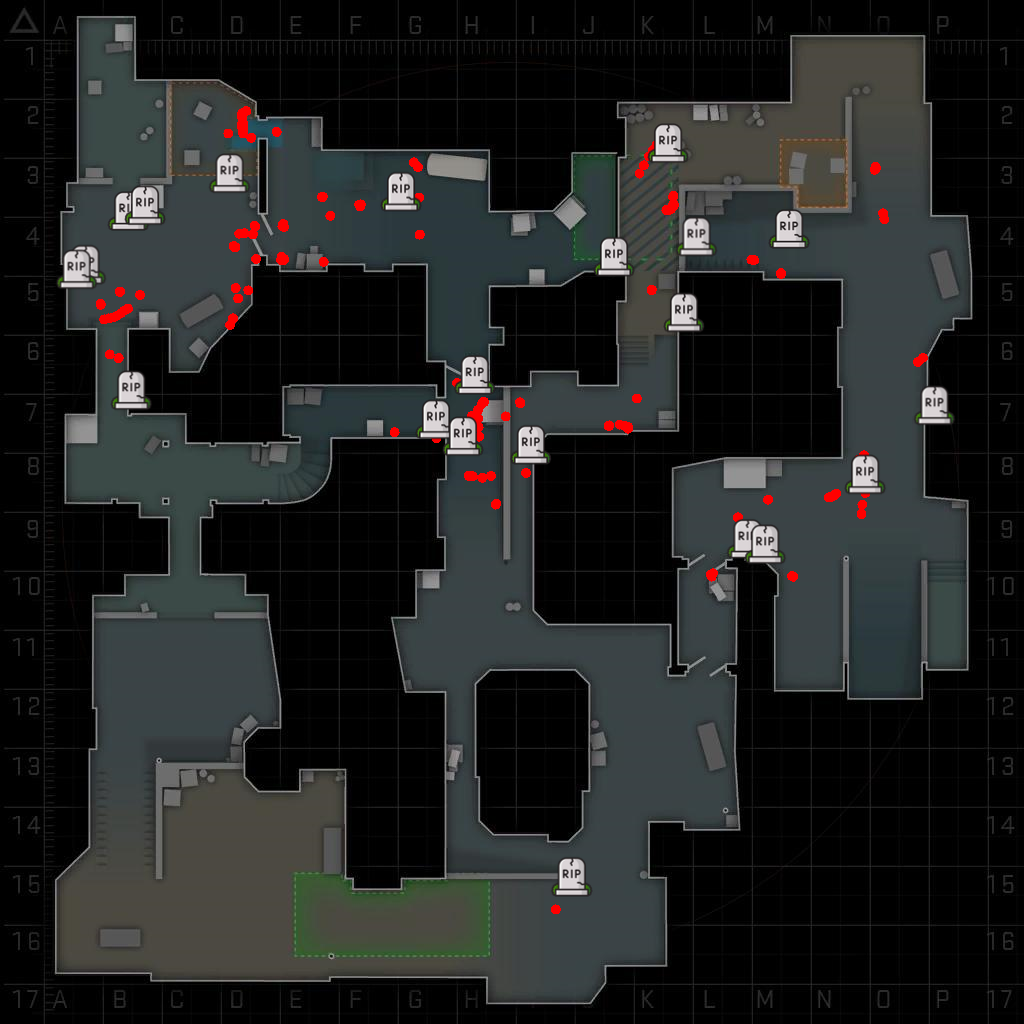

In [16]:
response = rq.get(url_api + "GetHeatMap", verify=False, stream=True)

with open('heat_map.png', 'wb') as image:
    shutil.copyfileobj(response.raw, image)
del response

Image(filename='heat_map.png')